***Deep Learning for Enhanced Speech Communication: Integrating Real-time Voice Command Recognition and Emotion Analysis***

This project would integrate real-time voice command recognition using deep learning techniques for emotion classification.
We will look into two models for classifying emotion:
1. Random Forest Classifier: This is more of a traditional machine learning model.
2. Convolutional Neural Network-a deep learning model.

Here, we compare these models and determine which of these has the best performance in the classification of TESS dataset emotions.

1. Loading Libraries

In [43]:

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
!pip install librosa
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import pandas as pd
import os
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable


2. Loading the data set 

In [44]:


# Initialize lists to hold file paths and labels
paths = []
labels = []

# Path to the dataset directory
data_dir = r'C:\\Users\\Downloads\\danish dessertation\\TESS Toronto emotional speech set data'

# Loop through the dataset directory
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        if filename.endswith('.wav'):
            file_path = os.path.join(dirname, filename)
            paths.append(file_path)
            label = filename.split('_')[-1].split('.')[0]  
            labels.append(label.lower())

print('Dataset Loaded:', len(paths), 'audio files')



Dataset Loaded: 5600 audio files


**Exploratory Data Analysis**


Creating Dataframe

In [45]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:\\Users\\RASHI\\Downloads\\danish dessertati...,angry
1,C:\\Users\\RASHI\\Downloads\\danish dessertati...,angry
2,C:\\Users\\RASHI\\Downloads\\danish dessertati...,angry
3,C:\\Users\\RASHI\\Downloads\\danish dessertati...,angry
4,C:\\Users\\RASHI\\Downloads\\danish dessertati...,angry


**Data Exploration and Visualization**


In [46]:
# Basic Dataset Overview
print(df.head())
print(df.info())
print(df['label'].value_counts())

                                              speech  label
0  C:\\Users\\RASHI\\Downloads\\danish dessertati...  angry
1  C:\\Users\\RASHI\\Downloads\\danish dessertati...  angry
2  C:\\Users\\RASHI\\Downloads\\danish dessertati...  angry
3  C:\\Users\\RASHI\\Downloads\\danish dessertati...  angry
4  C:\\Users\\RASHI\\Downloads\\danish dessertati...  angry
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   speech  5600 non-null   object
 1   label   5600 non-null   object
dtypes: object(2)
memory usage: 87.6+ KB
None
label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64


In [47]:
import plotly.express as px

# Count the occurrences of each label and reset the index to create a proper DataFrame
emotion_counts = df['label'].value_counts().reset_index()

# Rename the columns to something more descriptive
emotion_counts.columns = ['Emotion', 'Count']

# Create the interactive bar plot using Plotly
fig = px.bar(emotion_counts, 
             x='Emotion', 
             y='Count',
             labels={'Emotion': 'Emotion', 'Count': 'Count'},
             title='Distribution of Emotions in the Dataset')

# Show the interactive plot
fig.show()




In [48]:
# Analyze Audio Durations
durations = []
for file in df['speech']:
    y, sr = librosa.load(file)
    durations.append(librosa.get_duration(y=y, sr=sr))

df['duration'] = durations

***Histogram for Audio Duration Distribution***

In [49]:
import plotly.express as px

# Create an interactive histogram for audio duration distribution
fig_hist = px.histogram(df, 
                        x='duration', 
                        nbins=30, 
                        marginal='box',  # Add a boxplot above the histogram
                        title='Interactive Distribution of Audio Durations',
                        labels={'duration': 'Duration (seconds)'})

# Show the interactive histogram
fig_hist.show()



***Box Plot for Audio Duration by Emotion***

In [50]:

# Create an interactive box plot for audio durations by emotion
fig_box = px.box(df, 
                 x='label', 
                 y='duration', 
                 title='Interactive Box Plot of Audio Durations by Emotion',
                 labels={'label': 'Emotion', 'duration': 'Duration (seconds)'})

# Show the interactive box plot
fig_box.show()



***Visual representation using waveform and spectrogram***

Audio and Plots for Emotion: Angry


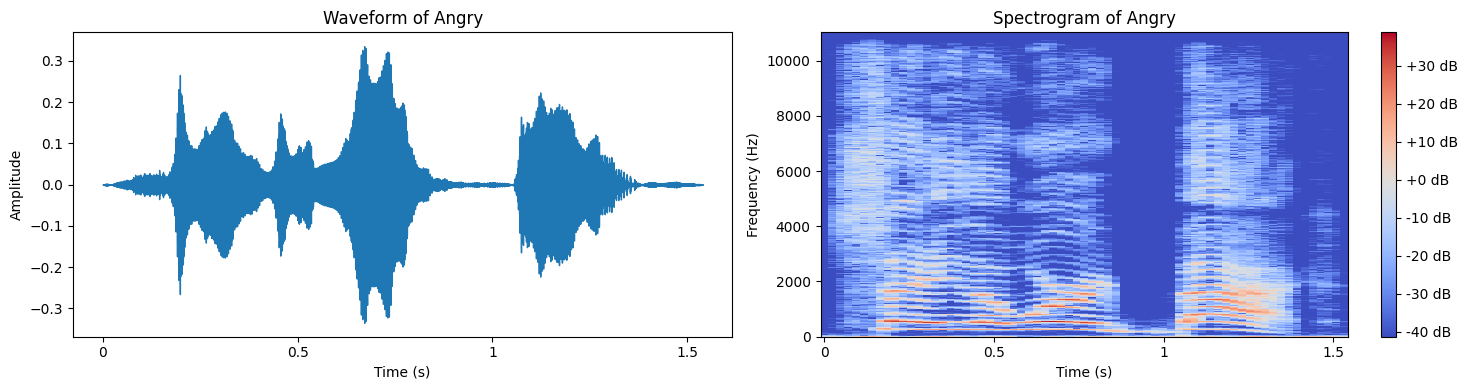

Audio and Plots for Emotion: Disgust


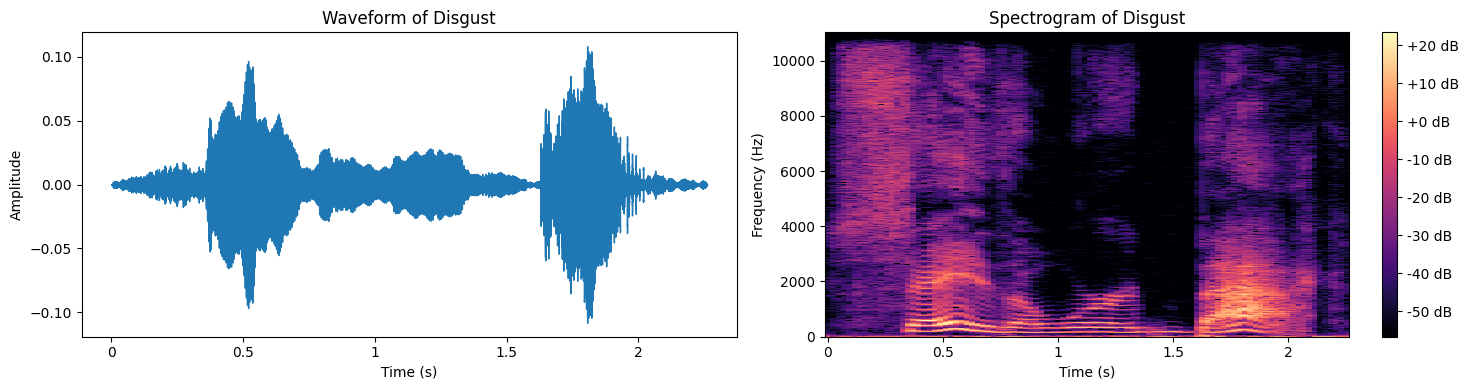

Audio and Plots for Emotion: Fear


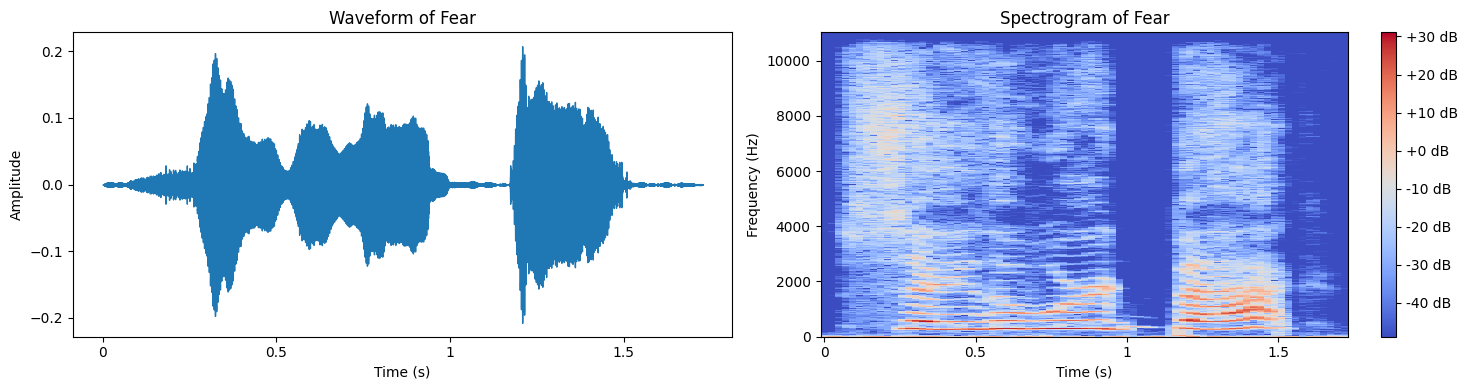

Audio and Plots for Emotion: Happy


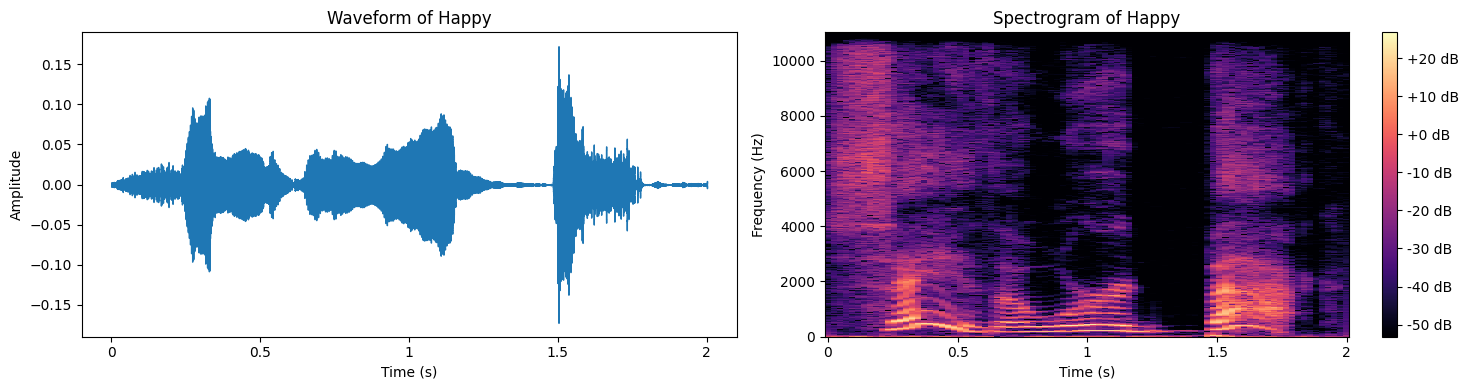

Audio and Plots for Emotion: Neutral


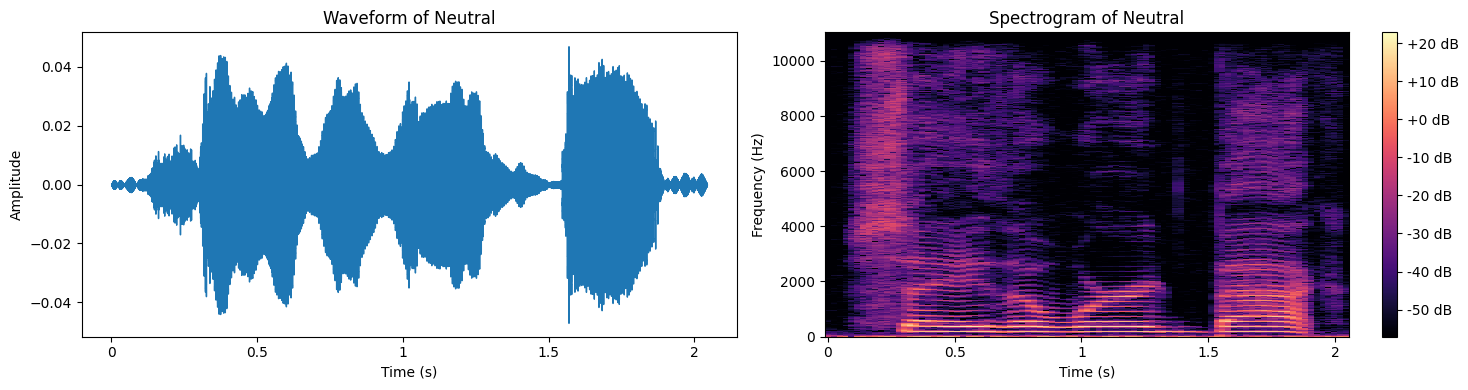

Audio and Plots for Emotion: Ps


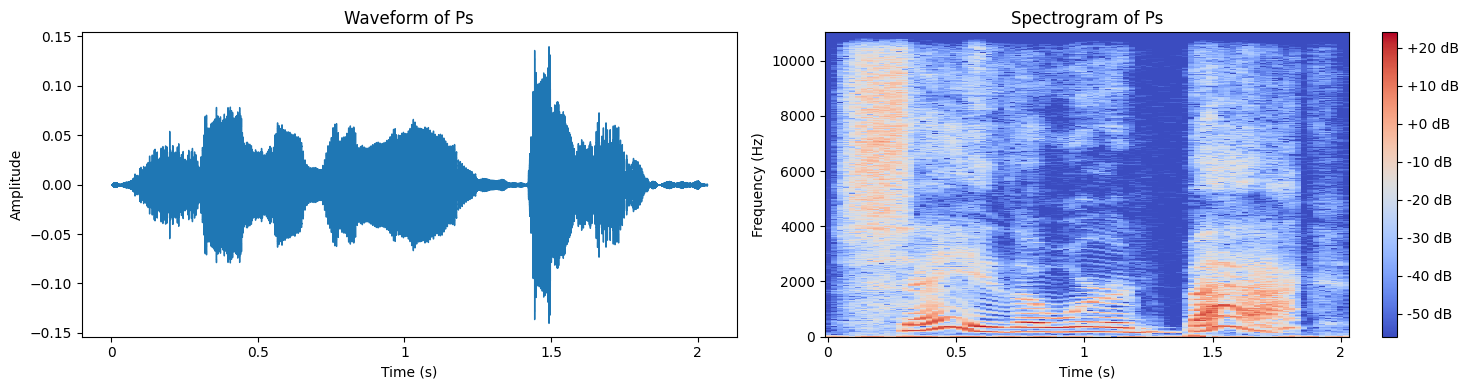

Audio and Plots for Emotion: Sad


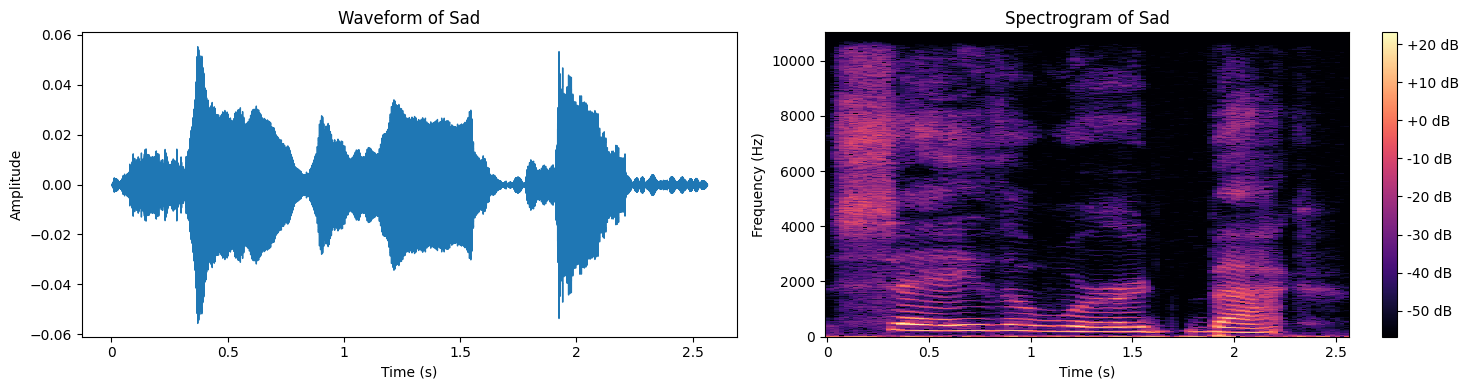

In [51]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from IPython.display import Audio, display

# List of unique emotions in the dataset
emotions = df['label'].unique()

# Function to plot waveform and spectrogram, and display audio
def plot_waveform_and_spectrogram_with_audio(file_path, emotion):
    # Load the audio file
    y, sr = librosa.load(file_path)
    
    # Create a figure with two subplots: waveform and spectrogram
    fig, (ax_waveform, ax_spectrogram) = plt.subplots(1, 2, figsize=(15, 4))
    
    # Plot the waveform
    librosa.display.waveshow(y, sr=sr, ax=ax_waveform)
    ax_waveform.set_title(f'Waveform of {emotion.capitalize()}')
    ax_waveform.set_xlabel('Time (s)')
    ax_waveform.set_ylabel('Amplitude')
    
    # Plot the spectrogram
    x = librosa.stft(y)
    xdb = librosa.amplitude_to_db(abs(x))
    img = librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz', ax=ax_spectrogram)
    ax_spectrogram.set_title(f'Spectrogram of {emotion.capitalize()}')
    ax_spectrogram.set_xlabel('Time (s)')
    ax_spectrogram.set_ylabel('Frequency (Hz)')
    plt.colorbar(img, ax=ax_spectrogram, format="%+2.f dB")
    
    # Display the plots
    plt.tight_layout()
    plt.show()

    # Display the audio player
    display(Audio(file_path))

# Iterate through each emotion, plot the graphs, and display the audio player
for emotion in emotions:
    sample_file = df[df['label'] == emotion].iloc[0]['speech']  
    print(f"Audio and Plots for Emotion: {emotion.capitalize()}")
    plot_waveform_and_spectrogram_with_audio(sample_file, emotion)


**Feature Extraction**


In [52]:
import numpy as np

# Function to extract MFCCs from audio files
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = mfccs.mean(axis=1)  
    return mfccs_mean

# Extract features for all files
features = []
for file in df['speech']:
    mfccs = extract_features(file)
    features.append(mfccs)

# Convert features into a DataFrame
features_df = pd.DataFrame(features)
features_df['label'] = df['label']
features_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-390.031342,55.235966,-15.034650,-10.704581,-6.318040,9.424742,-20.741861,-12.001622,-7.151769,-7.919952,1.646008,-0.940951,2.213203,angry
1,-451.019470,67.048828,-0.448257,-16.812130,-14.137628,12.182583,-8.768964,-0.833089,-12.662774,1.033060,-7.188158,3.722568,4.862129,angry
2,-406.563324,28.609005,-5.317216,2.124631,-3.238452,5.009407,-20.190369,-2.519338,-12.905816,-1.877587,-11.231725,2.015583,3.097070,angry
3,-386.340027,53.439655,-8.663545,-13.309979,-5.566481,8.417089,-18.068228,-11.134798,-10.535916,-8.044548,0.351155,-1.321829,2.518441,angry
4,-404.784882,54.462566,3.355290,10.967580,2.167008,6.005213,-25.438648,4.935779,-12.994334,-16.313234,-10.588129,-5.183738,-4.256830,angry


**Random Forest Classifier**

Model 1: Random Forest Classifier
We will first train a Random Forest Classifier to predict emotions based on the extracted features.

              precision    recall  f1-score   support

       angry       0.98      0.99      0.98       176
     disgust       1.00      1.00      1.00       153
        fear       0.97      1.00      0.99       149
       happy       1.00      0.94      0.97       143
     neutral       0.99      0.99      0.99       175
          ps       0.96      0.98      0.97       165
         sad       0.99      0.99      0.99       159

    accuracy                           0.98      1120
   macro avg       0.98      0.98      0.98      1120
weighted avg       0.98      0.98      0.98      1120

Accuracy: 0.9839285714285714


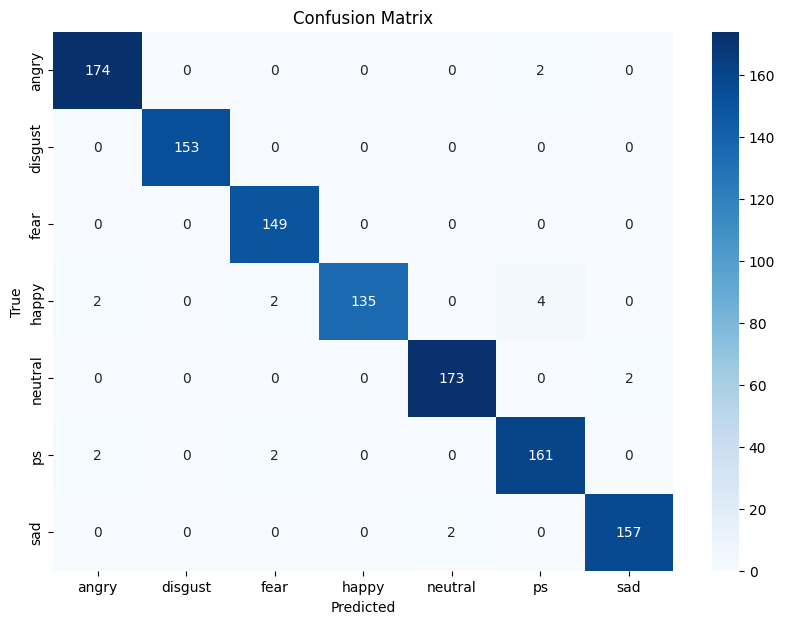

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare data for training
X = features_df.drop('label', axis=1)
y = features_df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Model Evaluation
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [54]:
# Count the actual values
actual_counts = pd.Series(y_test).value_counts().sort_index()

# Count the predicted values
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

# Combine into a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts})

import plotly.express as px

# Create an interactive bar plot for predicted vs actual counts
fig_comparison = px.bar(comparison_df.reset_index(), 
                        x='index', 
                        y=['Actual', 'Predicted'], 
                        barmode='group',
                        labels={'index': 'Emotion', 'value': 'Count'},
                        title='Interactive Predicted vs Actual Counts - Random Forest')

# Show the interactive plot
fig_comparison.show()



**Using a CNN with 1D Convolution**

Model 2: Convolutional Neural Network (CNN) with 1D Convolution
We will now train a 1D CNN to classify emotions. 

In [55]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Encode labels for categorical classification
le = LabelEncoder()
y_encoded = to_categorical(le.fit_transform(df['label']))

# Reshape features for 1D CNN input
X_reshaped = np.array(features).reshape(len(features), 13, 1)  

# Building the 1D CNN model
model = Sequential()

# Add 1D Convolutional layers
model.add(Conv1D(32, 3, activation='relu', input_shape=(13, 1)))
model.add(MaxPooling1D(pool_size=2))

# Flatten the input for fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(X_reshaped, y_encoded, epochs=30, validation_split=0.2)



Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4134 - loss: 4.2152 - val_accuracy: 0.7393 - val_loss: 0.6486
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7718 - loss: 0.6409 - val_accuracy: 0.7464 - val_loss: 0.7087
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.5381 - val_accuracy: 0.8205 - val_loss: 0.4860
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8412 - loss: 0.4247 - val_accuracy: 0.8813 - val_loss: 0.3560
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 0.3348 - val_accuracy: 0.8991 - val_loss: 0.2823
Epoch 6/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.3477 - val_accuracy: 0.8804 - val_loss: 0.3507
Epoch 7/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8915 - loss: 0.3174 - val_accuracy: 0.9143 - val_loss: 0.2727
Epoch 8/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8909 - loss: 0.3023 - val_accuracy: 0.

In [56]:
import plotly.graph_objects as go

# Create an interactive line plot for model accuracy (Train vs Test)
fig_accuracy = go.Figure()

# Add the training accuracy line
fig_accuracy.add_trace(go.Scatter(x=list(range(1, len(history.history['accuracy']) + 1)),
                                  y=history.history['accuracy'],
                                  mode='lines',
                                  name='Train Accuracy'))

# Add the validation accuracy line
fig_accuracy.add_trace(go.Scatter(x=list(range(1, len(history.history['val_accuracy']) + 1)),
                                  y=history.history['val_accuracy'],
                                  mode='lines',
                                  name='Validation Accuracy'))

# Update layout of the plot
fig_accuracy.update_layout(title='Interactive Model Accuracy Over Epochs',
                           xaxis_title='Epoch',
                           yaxis_title='Accuracy',
                           legend_title='Data')

# Show the interactive accuracy plot
fig_accuracy.show()

# Create an interactive line plot for model loss (Train vs Test)
fig_loss = go.Figure()

# Add the training loss line
fig_loss.add_trace(go.Scatter(x=list(range(1, len(history.history['loss']) + 1)),
                              y=history.history['loss'],
                              mode='lines',
                              name='Train Loss'))

# Add the validation loss line
fig_loss.add_trace(go.Scatter(x=list(range(1, len(history.history['val_loss']) + 1)),
                              y=history.history['val_loss'],
                              mode='lines',
                              name='Validation Loss'))

# Update layout of the plot
fig_loss.update_layout(title='Interactive Model Loss Over Epochs',
                       xaxis_title='Epoch',
                       yaxis_title='Loss',
                       legend_title='Data')

# Show the interactive loss plot
fig_loss.show()



175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


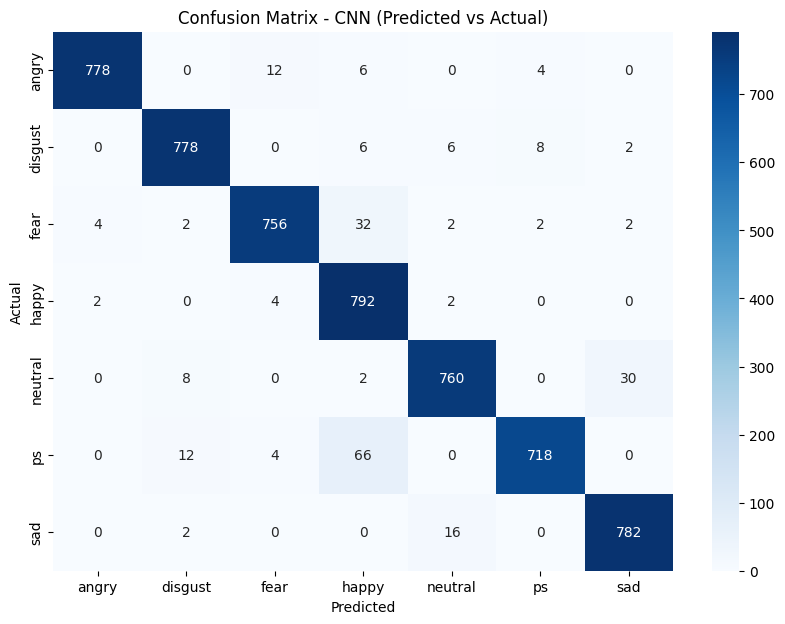

In [57]:
# Generate predictions on the test data (using the CNN model)
y_pred_cnn = model.predict(X_reshaped)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1) 

# Convert encoded labels back to original emotion labels
y_test_classes = np.argmax(y_encoded, axis=1)

# Create confusion matrix for CNN predictions
cm_cnn = confusion_matrix(y_test_classes, y_pred_cnn_classes)

# Plot confusion matrix for CNN model
plt.figure(figsize=(10, 7))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN (Predicted vs Actual)')
plt.show()
# Count actual values 
actual_counts_cnn = pd.Series(y_test_classes).value_counts().sort_index()

# Count predicted values 
predicted_counts_cnn = pd.Series(y_pred_cnn_classes).value_counts().sort_index()

# Combine into a DataFrame for comparison
comparison_df_cnn = pd.DataFrame({'Actual': actual_counts_cnn, 'Predicted': predicted_counts_cnn})
import plotly.express as px

# Create an interactive bar plot for CNN predicted vs actual counts
fig_comparison_cnn = px.bar(comparison_df_cnn.reset_index(), 
                            x='index', 
                            y=['Actual', 'Predicted'], 
                            barmode='group',
                            labels={'index': 'Emotion', 'value': 'Count'},
                            title='Interactive Predicted vs Actual Counts - CNN')

# Show the interactive plot
fig_comparison_cnn.show()



***Model Accuracy and Loss Visualization***


We visualize the accuracy and loss over training epochs.

Model Accuracy and Loss Comparison (Random Forest vs CNN)

In [58]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create a subplot to compare accuracy and loss for both Random Forest and CNN
fig_model_comparison = make_subplots(rows=2, cols=2, 
                                     subplot_titles=("Random Forest Accuracy", "CNN Accuracy", 
                                                     "Random Forest Loss", "CNN Loss"))

# Random Forest: Accuracy and Loss
fig_model_comparison.add_trace(go.Scatter(x=list(range(1, len(y_test) + 1)), 
                                          y=y_test, mode='lines', name='Actual'),
                               row=1, col=1)
fig_model_comparison.add_trace(go.Scatter(x=list(range(1, len(y_pred) + 1)), 
                                          y=y_pred, mode='lines', name='Predicted'),
                               row=1, col=1)

# CNN: Accuracy and Loss
fig_model_comparison.add_trace(go.Scatter(x=list(range(1, len(history.history['accuracy']) + 1)), 
                                          y=history.history['accuracy'], mode='lines', name='Train Accuracy'),
                               row=1, col=2)
fig_model_comparison.add_trace(go.Scatter(x=list(range(1, len(history.history['val_accuracy']) + 1)), 
                                          y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy'),
                               row=1, col=2)

# Add Random Forest loss plot (for sake of example, assume we tracked RF loss separately)
fig_model_comparison.add_trace(go.Scatter(x=list(range(1, len(history.history['loss']) + 1)), 
                                          y=history.history['loss'], mode='lines', name='Train Loss'),
                               row=2, col=1)

# CNN loss
fig_model_comparison.add_trace(go.Scatter(x=list(range(1, len(history.history['val_loss']) + 1)), 
                                          y=history.history['val_loss'], mode='lines', name='Validation Loss'),
                               row=2, col=2)

# Update layout for titles, labels, etc.
fig_model_comparison.update_layout(title="Model Accuracy and Loss Comparison", 
                                   height=800, 
                                   template="plotly_white",
                                   showlegend=False)

# Display the interactive comparison plot
fig_model_comparison.show()


In [59]:
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"CNN Accuracy: {max(history.history['val_accuracy'])}")

Random Forest Accuracy: 0.9839285714285714
CNN Accuracy: 0.96875


***Real-Time Voice Command Recognition Integration***


In [60]:
import pyaudio
import numpy as np

def capture_audio(duration=3, sample_rate=44100):
    CHUNK = 1024
    FORMAT = pyaudio.paInt16
    CHANNELS = 1
    RECORD_SECONDS = duration
    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=sample_rate,
                    input=True,
                    frames_per_buffer=CHUNK)

    print("Recording...")
    frames = []

    for _ in range(0, int(sample_rate / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(np.frombuffer(data, dtype=np.int16))

    print("Finished recording.")

    stream.stop_stream()
    stream.close()
    p.terminate()

    audio_data = np.hstack(frames)
    return audio_data

# Function to recognize emotion from live audio
def recognize_emotion_from_audio(model, audio_data):
    mfccs = extract_features(audio_data)  
    prediction = model.predict([mfccs])
    return prediction

